# Data Exploration for Text Classification

This notebook provides comprehensive data exploration and analysis for text classification datasets.

## Table of Contents
1. [Environment Setup](#setup)
2. [Dataset Loading](#loading)
3. [Basic Statistics](#stats)
4. [Text Analysis](#text-analysis)
5. [Label Distribution](#labels)
6. [Visualization](#visualization)
7. [Insights and Recommendations](#insights)

## 1. Environment Setup {#setup}

Import necessary libraries and configure settings.

In [1]:
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

from config import get_config
from data_preprocessing import DatasetLoader, analyze_dataset

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("Environment setup complete!")

Environment setup complete!


## 2. Dataset Loading {#loading}

Load and prepare the dataset for analysis.

In [2]:

config = get_config('imdb')  # Change to 'ag_news', 'yelp', etc.
loader = DatasetLoader(config)

dataset = loader.load_dataset_from_hub(config.data.dataset_name)
print(f"Dataset loaded: {config.data.dataset_name}")
print(f"Dataset structure: {dataset}")

INFO:data_preprocessing:Successfully loaded dataset: imdb


Dataset loaded: imdb
Dataset structure: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


## 3. Basic Statistics {#stats}

Explore basic dataset statistics and characteristics.

In [3]:

analysis = analyze_dataset(dataset, config.data.text_column, config.data.label_column)

for split_name, stats in analysis.items():
    print(f"\n=== {split_name.upper()} SET STATISTICS ===")
    print(f"Number of samples: {stats['num_samples']:,}")
    print(f"Number of unique labels: {stats['num_labels']}")
    print(f"Average text length: {stats['avg_text_length']:.1f} characters")
    print(f"Average word count: {stats['avg_word_count']:.1f} words")
    print(f"Text length range: {stats['min_text_length']} - {stats['max_text_length']} characters")
    print(f"Label distribution: {stats['label_distribution']}")


=== TRAIN SET STATISTICS ===
Number of samples: 25,000
Number of unique labels: 2
Average text length: 1325.1 characters
Average word count: 233.8 words
Text length range: 52 - 13704 characters
Label distribution: {0: 12500, 1: 12500}

=== TEST SET STATISTICS ===
Number of samples: 25,000
Number of unique labels: 2
Average text length: 1293.8 characters
Average word count: 228.5 words
Text length range: 32 - 12988 characters
Label distribution: {0: 12500, 1: 12500}

=== UNSUPERVISED SET STATISTICS ===
Number of samples: 50,000
Number of unique labels: 1
Average text length: 1329.9 characters
Average word count: 234.4 words
Text length range: 43 - 14282 characters
Label distribution: {-1: 50000}


## 4. Text Analysis {#text-analysis}

Detailed analysis of text characteristics.

In [4]:

train_df = dataset['train'].to_pandas()

text_lengths = train_df[config.data.text_column].str.len()
word_counts = train_df[config.data.text_column].str.split().str.len()

print("Text Length Statistics:")
print(text_lengths.describe())

print("\nWord Count Statistics:")
print(word_counts.describe())
print("\n=== SAMPLE TEXTS ===")
for i, (text, label) in enumerate(zip(train_df[config.data.text_column][:3], 
                                     train_df[config.data.label_column][:3])):
    print(f"\nSample {i+1} (Label: {label}):")
    print(text[:200] + "..." if len(text) > 200 else text)

Text Length Statistics:
count    25000.00000
mean      1325.06964
std       1003.13367
min         52.00000
25%        702.00000
50%        979.00000
75%       1614.00000
max      13704.00000
Name: text, dtype: float64

Word Count Statistics:
count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: text, dtype: float64

=== SAMPLE TEXTS ===

Sample 1 (Label: 0):
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ev...

Sample 2 (Label: 0):
"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that ...

Sample 3 (Label: 0):
If only to avoid making this type of film in the future. T

## 5. Label Distribution {#labels}

Analyze the distribution of labels in the dataset.

In [5]:

label_counts = train_df[config.data.label_column].value_counts().sort_index()
print("Label Distribution:")
print(label_counts)
print(f"\nLabel Distribution (%):")
print((label_counts / len(train_df) * 100).round(2))
max_class = label_counts.max()
min_class = label_counts.min()
imbalance_ratio = max_class / min_class
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 2:
    print("Significant class imbalance detected!")
else:
    print("Classes are relatively balanced.")

Label Distribution:
label
0    12500
1    12500
Name: count, dtype: int64

Label Distribution (%):
label
0    50.0
1    50.0
Name: count, dtype: float64

Class Imbalance Ratio: 1.00
Classes are relatively balanced.


## 6. Visualization {#visualization}

Create visualizations to better understand the data.

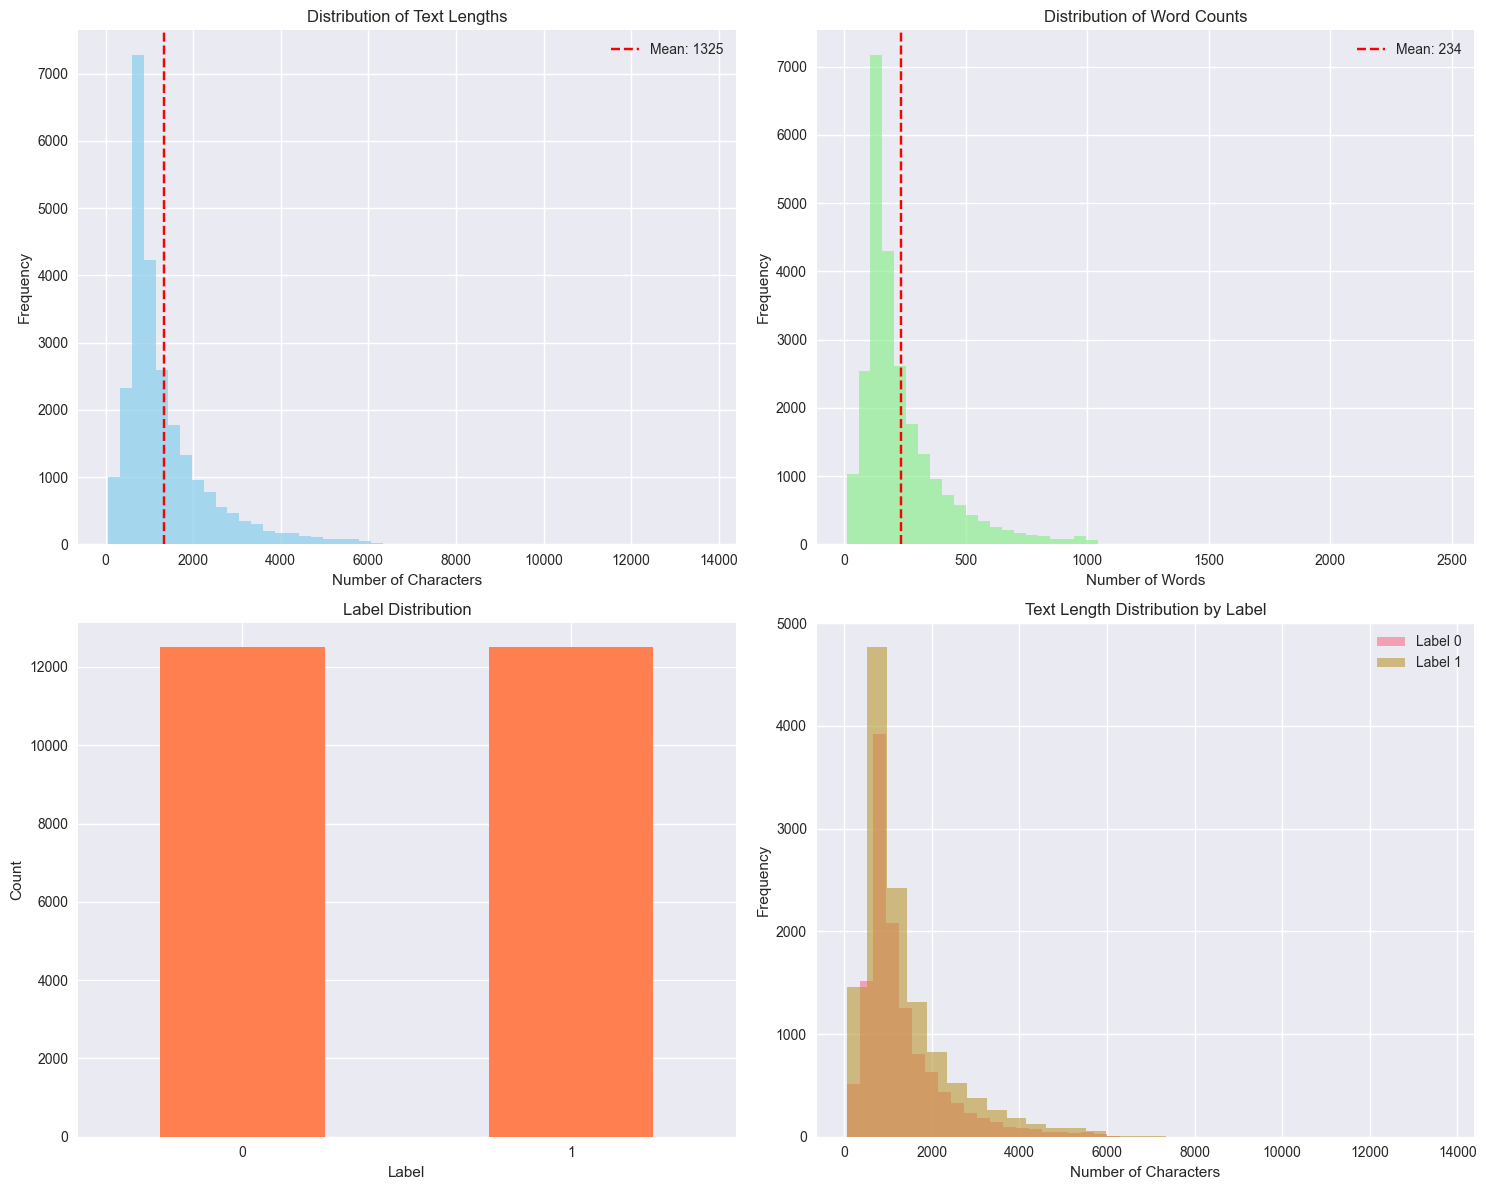

Visualizations created successfully!


In [6]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes[0, 0].hist(text_lengths, bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Text Lengths')
axes[0, 0].set_xlabel('Number of Characters')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(text_lengths.mean(), color='red', linestyle='--', 
                   label=f'Mean: {text_lengths.mean():.0f}')
axes[0, 0].legend()
axes[0, 1].hist(word_counts, bins=50, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Distribution of Word Counts')
axes[0, 1].set_xlabel('Number of Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(word_counts.mean(), color='red', linestyle='--',
                   label=f'Mean: {word_counts.mean():.0f}')
axes[0, 1].legend()
label_counts.plot(kind='bar', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Label Distribution')
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=0)
for label in train_df[config.data.label_column].unique():
    subset_lengths = train_df[train_df[config.data.label_column] == label][config.data.text_column].str.len()
    axes[1, 1].hist(subset_lengths, bins=30, alpha=0.6, label=f'Label {label}')
axes[1, 1].set_title('Text Length Distribution by Label')
axes[1, 1].set_xlabel('Number of Characters')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")

## 7. Insights and Recommendations {#insights}

Based on the data exploration, here are key insights and recommendations for model training.

In [7]:

insights = []
total_samples = sum([stats['num_samples'] for stats in analysis.values()])
if total_samples >= 10000:
    insights.append("Dataset size is sufficient for deep learning approaches.")
elif total_samples >= 1000:
    insights.append("Medium dataset size - consider data augmentation or transfer learning.")
else:
    insights.append("Small dataset - strong regularization and transfer learning essential.")
avg_length = analysis['train']['avg_text_length']
if avg_length > 1000:
    insights.append("Long texts detected - consider using models that handle long sequences well.")
    insights.append(f"Recommended max_length: {min(512, int(avg_length * 1.5))}")
else:
    insights.append("Text lengths are manageable for standard transformer models.")
    insights.append("Recommended max_length: 512")
if imbalance_ratio > 2:
    insights.append(" Class imbalance detected - consider weighted loss or sampling strategies.")
else:
    insights.append("Classes are well balanced - standard training approach suitable.")
num_classes = analysis['train']['num_labels']
if num_classes == 2:
    insights.append("Binary classification - can use sigmoid activation and binary cross-entropy.")
else:
    insights.append(f"Multi-class classification ({num_classes} classes) - use softmax and categorical cross-entropy.")

print("=== DATA EXPLORATION INSIGHTS ===")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print("\n=== NEXT STEPS ===")
print("1. Run model training with appropriate configuration")
print("2. Monitor training/validation curves for overfitting")
print("3. Perform error analysis on validation set")
print("4. Consider data augmentation if needed")
print("5. Evaluate final model on test set")

=== DATA EXPLORATION INSIGHTS ===
1. Dataset size is sufficient for deep learning approaches.
2. Long texts detected - consider using models that handle long sequences well.
3. Recommended max_length: 512
4. Classes are well balanced - standard training approach suitable.
5. Binary classification - can use sigmoid activation and binary cross-entropy.

=== NEXT STEPS ===
1. Run model training with appropriate configuration
2. Monitor training/validation curves for overfitting
3. Perform error analysis on validation set
4. Consider data augmentation if needed
5. Evaluate final model on test set


## Conclusion

This data exploration provides a comprehensive understanding of the dataset characteristics, which will inform our model training decisions. The insights generated above should guide the configuration and training approach for optimal results.

